Reproduced exercise at https://www.youtube.com/watch?v=H7qMMudo3e8&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=6

# Sklearn implementation

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image

In [2]:
A = matplotlib.image.imread('./mandrill-large.tiff')

In [3]:
A.shape

(512, 512, 3)

In [4]:
# X = A.mean(axis=-1)
X = np.mean(A, axis=2)

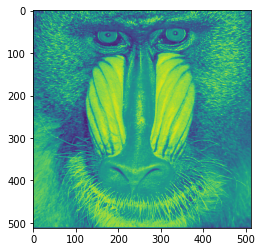

In [5]:
plt.imshow(X)

In [6]:
U, Σ, Vh = np.linalg.svd(X, full_matrices=False)

In [7]:
U.shape

(512, 512)

In [8]:
Vh.shape

(512, 512)

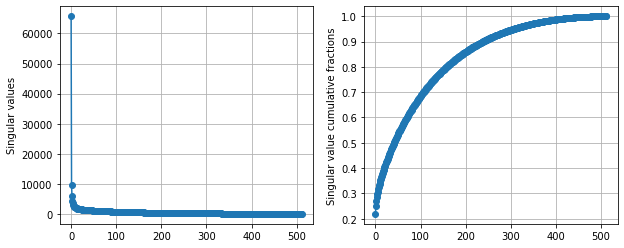

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.ravel()

axes[0].plot(Σ, marker='o')
axes[0].set(ylabel='Singular values')
axes[0].grid()

axes[1].plot(np.cumsum(Σ / Σ.sum()), marker='o')
axes[1].set(ylabel='Singular value cumulative fractions')
axes[1].grid()

In [10]:
X.size

262144

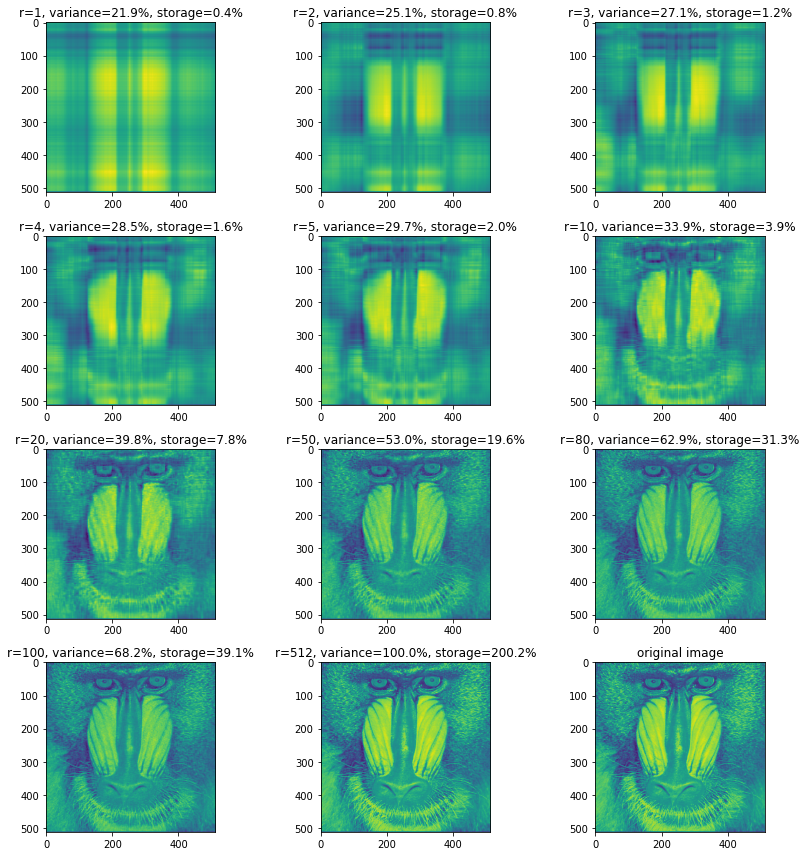

In [12]:
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
axes = axes.ravel()

raw_size = X.size
for k, r in enumerate([1, 2, 3, 4, 5, 10, 20, 50, 80, 100, len(Σ)]):

    U_r = U[:, :r]
    Σ_r = Σ[:r]
    Vh_r = Vh[:r, :]

    X_hat = U_r @ np.diag(Σ_r) @ Vh_r

    reduced_size = U_r.size + Σ_r.size + Vh_r.size

    ax = axes[k]
    ax.imshow(X_hat)
    ax.set(
        title=f"{r=:}, variance={Σ[:r].sum() / Σ.sum():.1%}, storage={reduced_size / raw_size:.1%}",
    )
    
# use the raw image for comparison.
axes[-1].imshow(X)
axes[-1].set(title='original image')
plt.tight_layout()